In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.precision',2)

In [6]:
heart=pd.read_csv('/content/heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
display(heart.shape)
display(heart.size)

(918, 12)

11016

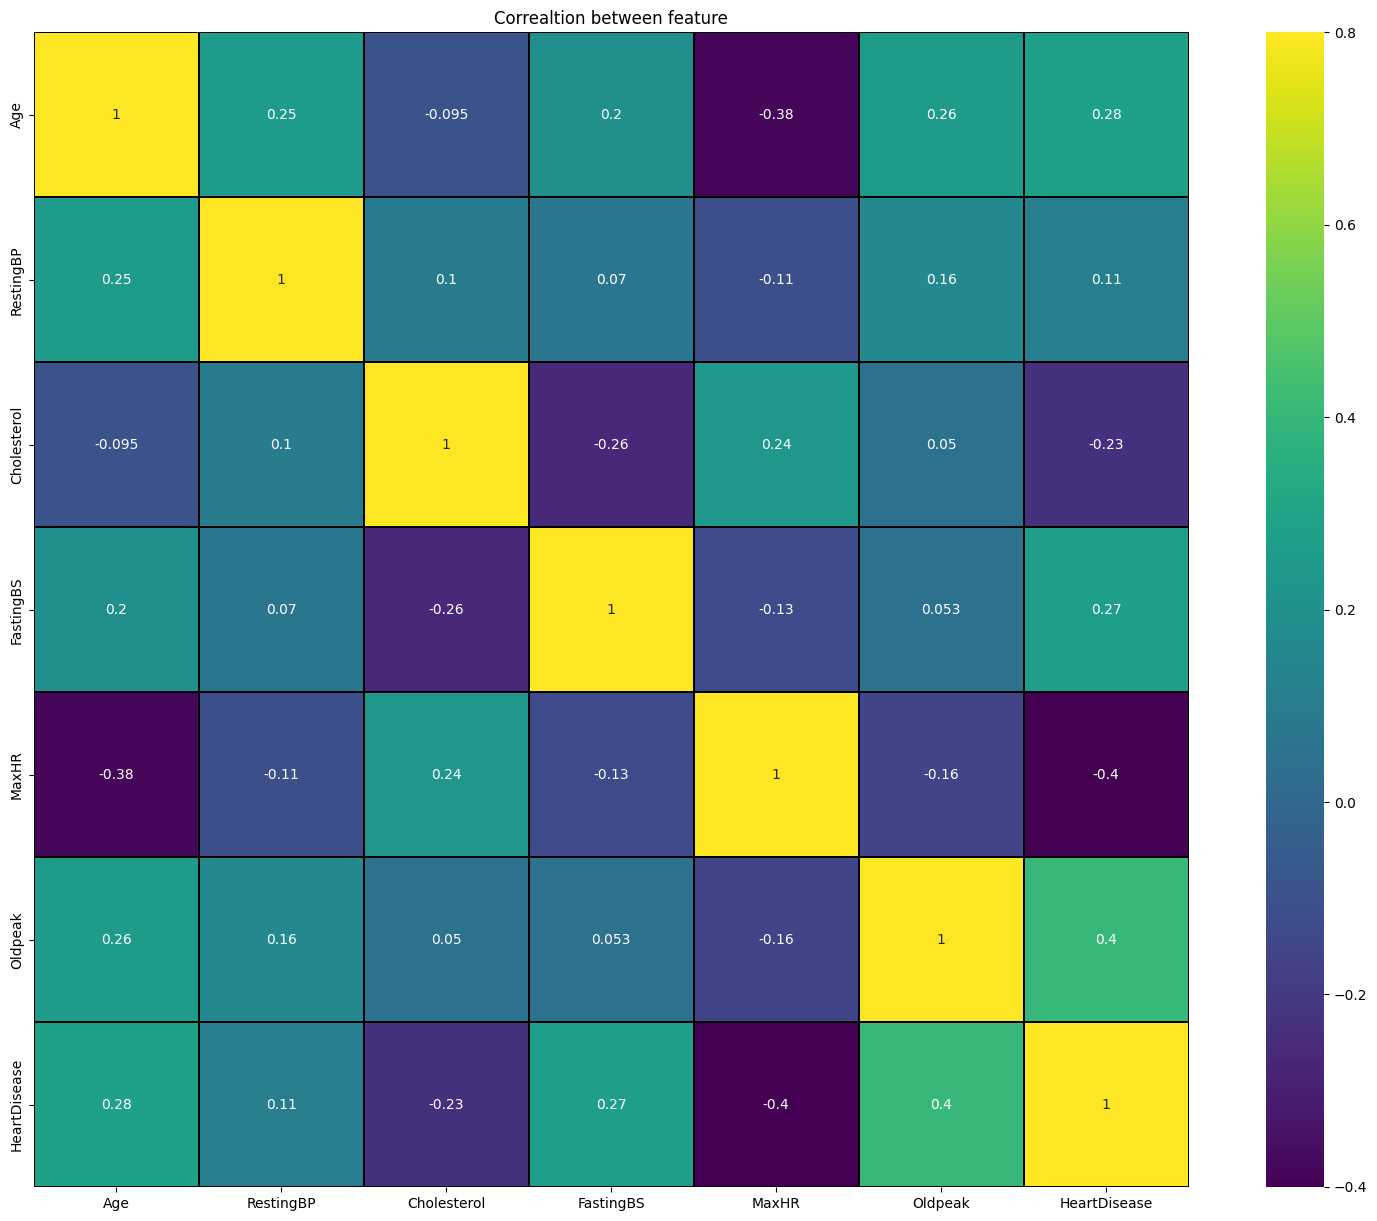

In [8]:
corr=heart.select_dtypes(include='number').corr()#['HeartDisease]
plt.figure(figsize=(20,15))
sns.heatmap(corr, vmax=.8, linewidth=0.01, square=True, annot=True, cmap='viridis',linecolor='black')
plt.title('Correaltion between feature')
plt.show()

In [9]:
heart_1=heart.copy()

In [10]:
X=heart_1.drop(columns='HeartDisease', axis=1)
Y=heart_1['HeartDisease']
X['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [11]:
X=pd.get_dummies(X, columns=['RestingECG'])
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,M,ATA,140,289,0,172,N,0.0,Up,False,True,False
1,49,F,NAP,160,180,0,156,N,1.0,Flat,False,True,False
2,37,M,ATA,130,283,0,98,N,0.0,Up,False,False,True
3,48,F,ASY,138,214,0,108,Y,1.5,Flat,False,True,False
4,54,M,NAP,150,195,0,122,N,0.0,Up,False,True,False


In [12]:
X=pd.get_dummies(X,drop_first=True)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,True,False,False,False,False,True
1,49,160,180,0,156,1.0,False,True,False,False,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,False,True,True,True,False,False,False,False,True
3,48,138,214,0,108,1.5,False,True,False,False,False,False,False,True,True,False
4,54,150,195,0,122,0.0,False,True,False,True,False,True,False,False,False,True


In [13]:
heart_2=heart.copy()

In [14]:
X=heart_2.drop(columns='HeartDisease',axis=1)
Y=heart_2['HeartDisease']
X['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [15]:
#One hot encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
X["RestingECG"]=encoder.fit_transform(X['RestingECG'])
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,1,172,N,0.0,Up
1,49,F,NAP,160,180,0,1,156,N,1.0,Flat
2,37,M,ATA,130,283,0,2,98,N,0.0,Up
3,48,F,ASY,138,214,0,1,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,1,122,N,0.0,Up


In [16]:
X['RestingECG'].value_counts()

,count
RestingECG,
1,552
0,188
2,178


In [17]:
heart=pd.read_csv('/content/heart.csv')
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
categorical_feature=heart.columns.tolist()
for col in categorical_feature:
    heart[col]=encoder.fit_transform(heart[col])
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [18]:
heart_3=heart.copy()

In [19]:
X=heart_3.drop(columns='HeartDisease',axis=1)
Y=heart_3['HeartDisease']
X['RestingECG'].value_counts()

,count
RestingECG,
1,552
0,188
2,178


In [20]:
#One hot encoder
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')
X=pd.DataFrame(ohe.fit_transform(X[['RestingECG']]).toarray())
X.head()

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [21]:
X=pd.concat([heart_3,X],axis=1).drop('RestingECG',axis=1)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,0,1,2
0,12,1,1,41,147,0,98,0,10,2,0,0.0,1.0,0.0
1,21,0,2,55,40,0,82,0,20,1,1,0.0,1.0,0.0
2,9,1,1,31,141,0,25,0,10,2,0,0.0,0.0,1.0
3,20,0,0,39,72,0,34,1,25,1,1,0.0,1.0,0.0
4,26,1,2,49,53,0,48,0,10,2,0,0.0,1.0,0.0


In [22]:
#Ordinal Encoding
heart_4=heart.copy()

In [23]:
X=heart_4.drop(columns='HeartDisease',axis=1)
Y=heart_4['HeartDisease']

X['RestingECG'].value_counts()

,count
RestingECG,
1,552
0,188
2,178


In [24]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [25]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['RestingECG'])
X=encoder.fit_transform(X)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


In [26]:
X['RestingECG'].value_counts()

,count
RestingECG,
1,552
3,188
2,178


In [27]:
heart_5=heart.copy()

In [28]:
X=heart_5.drop(columns='HeartDisease',axis=1)
Y=heart_5['HeartDisease']
X['RestingECG'].value_counts()

,count
RestingECG,
1,552
0,188
2,178


In [29]:
X['RestingECG'].replace({'Normal':0, 'LVH':1, 'ST':2},inplace=True)

In [30]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


In [31]:
X['RestingECG'].value_counts()

,count
RestingECG,
1,552
0,188
2,178


In [36]:
X=heart_1.drop(columns='HeartDisease',axis=1)
y=heart_1['HeartDisease']

In [37]:
X=pd.get_dummies(X, drop_first=True)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True


In [38]:
#Training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)


In [40]:
#Model Building
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import xgboost as Xgb
xgb=Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train=round(xgb.score(X_train,y_train) * 100,2)
xgb_accuracy=round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print('Traing Accuracy:',xgb_train,'%')
print('Model Accuracy Score:',xgb_accuracy,'%')
print("\033[1m--------------------------------------------------------\033[0m")
print('Classification_Report\n',classification_report(y_test, y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")

Traing Accuracy: 100.0 %
Model Accuracy Score: 86.96 %
--------------------------------------------------------
Classification_Report
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

--------------------------------------------------------


In [42]:
prediction=xgb.predict(X_test)
print(prediction)

[0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1
 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1]


In [43]:
cross_checking=pd.DataFrame({'Actual':y_test, 'Predicted':prediction})
cross_checking.head(10).style.background_gradient(cmap='coolwarm').set_properties(**{'colors':'Lucida Calligraphy',
                                                                                     'color':'LightGreen',
                                                                                     'font-size':'15px'})


,Actual,Predicted
668,0,0
30,1,1
377,1,1
535,1,1
807,0,0
793,1,0
363,1,1
583,0,0
165,1,1
483,1,1
